## Measuring efficiency of algorithms

shortest_path_times [3.509999078232795e-05, 0.00012989999959245324, 0.00016929999401327223, 0.00017500000831205398, 0.0002410000015515834, 0.00029490000451914966, 0.0004138999938732013, 0.00043559999903663993, 0.0004867999959969893, 0.0004569000011542812]
dijkstra_path_times [0.0002677000011317432, 0.0021745999983977526, 0.0054543000005651265, 0.011922300007427111, 0.0191354999988107, 0.02896100000361912, 0.04040819998772349, 0.062004999999771826, 0.07671179999306332, 0.08930760000657756]


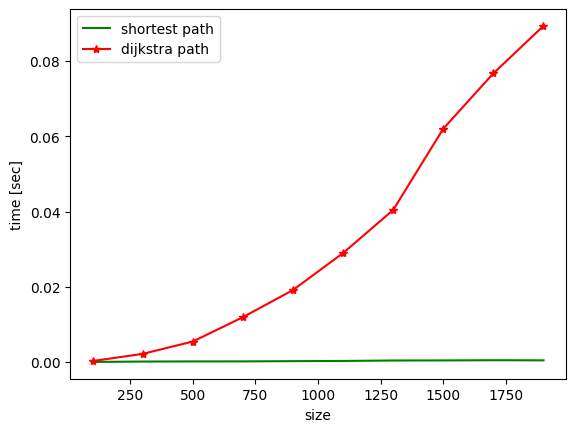

In [19]:
import numpy as np, networkx as nx, matplotlib.pyplot as plt

from time import process_time, process_time_ns, perf_counter, perf_counter_ns   # Exact measurement of CPU time
def measure_time(func, *args, **kwargs):
    """ return the run-time of the given function, in fractional seconds. """
    start = perf_counter()
    result = func(*args, **kwargs)
    end = perf_counter()
    return end-start

# pip install experiments_csv[plotting]
# import experiments_csv

def random_weighted_graph(num_of_nodes, probability_of_edge):
    G = nx.gnp_random_graph(num_of_nodes, probability_of_edge)  
    for (u, v) in G.edges():
        G.edges[u,v]['weight'] = np.random.randint(1,100)
    return G

probability_of_edge = 0.1
sizes = range(100, 2000, 200)
shortest_path_times = []
dijkstra_path_times = []
for i,size in enumerate(sizes):
    G = random_weighted_graph(size, probability_of_edge)
    shortest_path_times.append(measure_time(nx.single_source_shortest_path_length, G, 0))
    dijkstra_path_times.append(measure_time(nx.single_source_dijkstra_path_length, G, 0))
print("shortest_path_times", shortest_path_times)
print("dijkstra_path_times", dijkstra_path_times)
plt.plot(sizes, shortest_path_times, 'g-', label="shortest path")
plt.plot(sizes, dijkstra_path_times, 'r-*', label="dijkstra path")
plt.xlabel("size")
plt.ylabel("time [sec]")
plt.legend()
